
Audio File: C:\Users\Pc\Downloads\Funny Conversation Between Two Friends  #spokenenglish #shorts #shortvideo #conversation.mp3
Prediction: Not a Scream (Confidence: 0.9940)



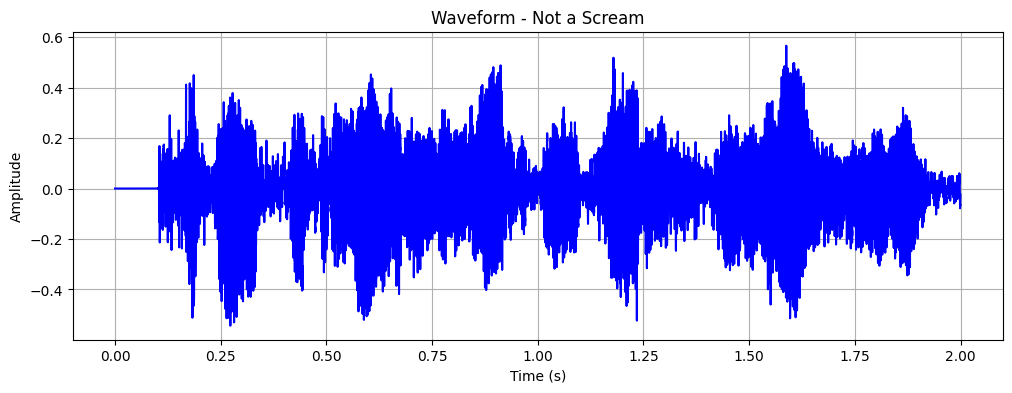

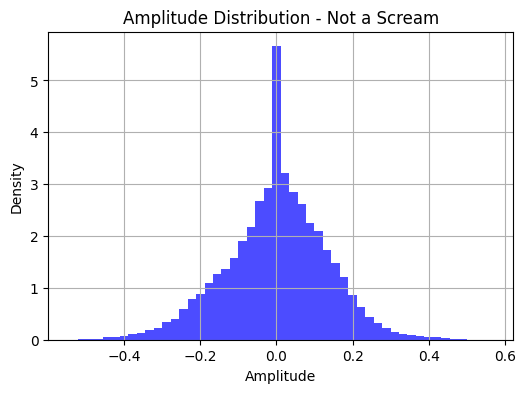


--------------------------------------------------
Audio Features:
- Max Amplitude: 0.5661
- Mean Amplitude: 0.1008
- Standard Deviation: 0.1335
- Duration: 2.0 seconds
- Sample Rate: 16000 Hz
--------------------------------------------------


In [1]:
import os
import numpy as np
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved trained model
model_path = r"C:\Users\Pc\Documents\Ml_Project\scream_1d_cnn_model.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Load audio function
def load_audio(file_path, sr=16000, duration=2.0):
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=duration, mono=True)
        target_length = int(sr * duration)
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)), mode='constant')
        return y[:target_length]
    except Exception as e:
        print(f"Failed to load {file_path}: {e}")
        return None

# Function to analyze and predict
def test_new_audio(file_path):
    # Load the audio
    audio = load_audio(file_path)
    if audio is None:
        print("Audio loading failed. Exiting.")
        return

    # Prepare audio for prediction
    audio_input = audio[np.newaxis, ..., np.newaxis]  # Shape: (1, 32000, 1)
    prediction = model.predict(audio_input, verbose=0)[0][0]

    # Determine if it's a scream
    is_scream = prediction > 0.5
    label = "Scream" if is_scream else "Not a Scream"
    confidence = prediction if is_scream else 1 - prediction

    # Highlighted output
    print(f"\n{'='*50}")
    print(f"Audio File: {file_path}")
    print(f"Prediction: \033[1;{31 if is_scream else 34}m{label}\033[0m (Confidence: {confidence:.4f})")
    print(f"{'='*50}\n")

    # Audio Features
    sr = 16000
    duration = 2.0
    t = np.linspace(0, duration, int(sr * duration))

    # Plot 1: Waveform
    plt.figure(figsize=(12, 4))
    plt.plot(t, audio, color='red' if is_scream else 'blue')
    plt.title(f'Waveform - {label}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Plot 2: Amplitude Distribution
    plt.figure(figsize=(6, 4))
    plt.hist(audio, bins=50, color='red' if is_scream else 'blue', alpha=0.7, density=True)
    plt.title(f'Amplitude Distribution - {label}')
    plt.xlabel('Amplitude')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    # Highlight Audio Features
    print(f"\n{'-'*50}")
    print("Audio Features:")
    print(f"- Max Amplitude: {np.max(np.abs(audio)):.4f}")
    print(f"- Mean Amplitude: {np.mean(np.abs(audio)):.4f}")
    print(f"- Standard Deviation: {np.std(audio):.4f}")
    print(f"- Duration: {duration} seconds")
    print(f"- Sample Rate: {sr} Hz")
    print(f"{'-'*50}")

# Test a new audio file
test_file = r"C:\Users\Pc\Downloads\Funny Conversation Between Two Friends  #spokenenglish #shorts #shortvideo #conversation.mp3"  # Replace with your file path
test_new_audio(test_file)

**Amplitude Range:**

* The "Not a Scream" graph has a smaller amplitude range (approximately -0.5 to 0.5).

* The "Scream" graph has a larger amplitude range (approximately -1.0 to 1.0), indicating higher energy in the signal.

**Peak Density at Zero:**

* The "Not a Scream" graph has a sharp peak at zero amplitude, meaning there are many low-amplitude values, possibly due to silence or low-intensity sound.

* The "Scream" graph also peaks at zero but is more spread out, meaning more variation in amplitude, characteristic of high-intensity vocal activity.

**Distribution Shape:**

* The "Not a Scream" graph has a more tightly packed, Gaussian-like distribution.

* The "Scream" graph is more spread out, suggesting higher dynamic range and intensity variations.

**Interpretation:**
* The "Not a Scream" signal is likely a lower-energy, more balanced sound (possibly speech or ambient noise).

* The "Scream" signal exhibits a broader, higher-energy amplitude range, which aligns with the expected characteristics of a scream (louder and more intense variations).